In [1]:
#!pip install replica!te
!pip install Pillow
!pip install requests
!export REPLICATE_API_TOKEN=<token>

In [8]:
import replicate
from PIL import Image
import io
import time
import requests
from IPython.display import display

async def run_vision(**kwargs):
    start_t = time.time()
    input = {
        "image": kwargs["image"],
        "prompt":kwargs["prompt"],
    }

    output = replicate.run(
         "yorickvp/llava-13b:b5f6212d032508382d61ff00469ddda3e32fd8a0e75dc39d8a4191bb742157fb",
        input=input
    )
    end_t = time.time()
    print(f"Time taken: {end_t - start_t}")
    return "".join(output)


async def run_replicate(**kwargs):
    start_t = time.time()
    input = {
        "image": kwargs["image"],
        "prompt": kwargs["prompt"],
    }

    output = replicate.run(
        "wolverinn/realistic-background:ce02013b285241316db1554f28b583ef5aaaf4ac4f118dc08c460e634b2e3e6b",
        input=input
    )
    end_t = time.time()
    print(f"Time taken: {end_t - start_t}")
    return output


# Load image from our cloudinary account
url = "https://res.cloudinary.com/dky11qong/image/upload/c_pad,b_auto:predominant,fl_preserve_transparency/v1711672225/tellit/ncgq9l8sanfy1jxx2fwl.jpg?_s=public-apps"

org = Image.open(io.BytesIO(requests.get(url).content))

# Run Replicate
prompt = await run_vision(
    image=url,
    prompt="what food is this?")
print(prompt)

result = await run_replicate(
    image=url,
    prompt=f"One {prompt} on table, 8k uhd, dslr, high quality, Fujifilm XT3")
print(result)

Time taken: 1.088498830795288
The food in the image is a waffle, which is served with strawberries and a syrup-like sauce.
Time taken: 45.33757996559143
{'image': 'https://replicate.delivery/pbxt/iyOIJt6oD7YAB5teUuJnn4JjSzeUqteQFLYUVnJwqnxP4XNlA/7b929cf6-f190-11ee-b54d-4aaf02c95d25.png', 'payload': {'info': '{"prompt": "One The food in the image is a waffle, which is served with strawberries and a syrup-like sauce. on table, 8k uhd, dslr, high quality, Fujifilm XT3", "all_prompts": ["One The food in the image is a waffle, which is served with strawberries and a syrup-like sauce. on table, 8k uhd, dslr, high quality, Fujifilm XT3"], "negative_prompt": "(deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime, mutated hands and fingers:1.4), (deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, disconnected limbs, mutation, mutated, ugly, disgusting, amputation", "all_negative_pr

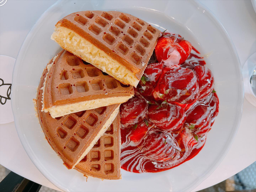

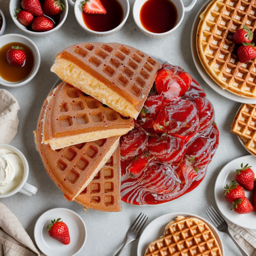

In [10]:
# Display the original image and the result
org.thumbnail((256, 256))
display(org)

resp = requests.get(result["image"])
img = Image.open(io.BytesIO(resp.content))
img.thumbnail((256, 256))
display(img)